# Final Exam BUS 458 — Loan Data Analysis
**Objective:** Your objective is to identify the key drivers of loan approval and recommend which lender should be prioritized for each customer to maximize total payout

### **Instructions**
- Follow the prompts in each section of this notebook.
- **Where you see a “Question,” answer it directly below in a Markdown (text) cell — not as a code comment.**
- Your **reasoning, interpretations, and insights** should be written in text cells, clearly separated from code.
- You are encouraged to add extra **code cells**, **visualizations**, or **short explanations** if they strengthen your analysis or help you justify decisions.
- Make sure your notebook runs cleanly from start to finish without errors.


# Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Load Data

In [9]:
# Loading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/loan_data_analysis_final.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Check first 5 rows of dataframe
data.head(5)

,User ID,applications,Reason,Granted_Loan_Amount,Requested_Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,123000.0,669.0,fair,full_time,consumer_discretionary,5024.0,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,79000.0,594.0,fair,full_time,information_technology,5764.0,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,11000.0,596.0,fair,full_time,information_technology,4017.0,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,120000.0,642.0,fair,part_time,energy,3129.0,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,34000.0,NaN,fair,full_time,energy,NaN,1620,0,A,0,0


# Shape and Basic Info

In [11]:
# Overview of the data and the shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User ID                     100000 non-null  object 
 1   applications                100000 non-null  int64  
 2   Reason                      100000 non-null  object 
 3   Granted_Loan_Amount         100000 non-null  int64  
 4   Requested_Loan_Amount       100000 non-null  float64
 5   FICO_score                  85000 non-null   float64
 6   Fico_Score_group            100000 non-null  object 
 7   Employment_Status           100000 non-null  object 
 8   Employment_Sector           93593 non-null   object 
 9   Monthly_Gross_Income        85000 non-null   float64
 10  Monthly_Housing_Payment     100000 non-null  int64  
 11  Ever_Bankrupt_or_Foreclose  100000 non-null  int64  
 12  Lender                      100000 non-null  object 
 13  Approved       

The shape shows us its (100000, 15)

In [12]:
# Checking the summary stats
data.describe()

,applications,Granted_Loan_Amount,Requested_Loan_Amount,FICO_score,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Approved,bounty
count,100000.0,1.000000e+05,1.000000e+05,85000.000000,85000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.0,6.478465e+04,7.450309e+04,629.338153,5808.783776,1888.900720,0.022460,0.109760,26.415000
std,0.0,1.965837e+05,2.264856e+05,88.684201,2988.185274,3431.924282,0.148175,0.312592,78.385644
min,1.0,5.000000e+03,5.000000e+03,300.000000,-17702.000000,300.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000e+04,2.400000e+04,572.000000,3659.000000,1231.000000,0.000000,0.000000,0.000000
50%,1.0,4.000000e+04,4.400000e+04,634.000000,5153.500000,1669.000000,0.000000,0.000000,0.000000
75%,1.0,7.000000e+04,8.400000e+04,693.000000,7612.000000,2051.000000,0.000000,0.000000,0.000000
max,1.0,2.000000e+06,2.500000e+06,850.000000,19997.000000,49500.000000,1.000000,1.000000,350.000000


In [13]:
# numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)


Numeric columns: ['applications', 'Granted_Loan_Amount', 'Requested_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment', 'Ever_Bankrupt_or_Foreclose', 'Approved', 'bounty']

Categorical columns: ['User ID', 'Reason', 'Fico_Score_group', 'Employment_Status', 'Employment_Sector', 'Lender']


In [14]:
# taking a closer look into the categorical values & their unique values
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Unique values:", data[col].unique()[:10])  # show first 10 to avoid huge output



Column: User ID
Unique values: ['00007820-89cb-4c1d-9940-eb270d605a35'
 '00012b55-514c-421e-9c76-3300abbc1134'
 '000157c1-b6a3-4c86-82c7-9ec1bda3799a'
 '00020400-efab-4b10-8812-2a0aaf774841'
 '0002f737-0cda-48fb-91ed-533f3d0eab05'
 '00030724-e12e-4902-bd36-f922692dcb1f'
 '0004091e-ef33-4feb-9fc2-7da41b1edadd'
 '00060c8b-b5ab-4dd1-900b-42bf6b06378b'
 '00063346-b404-4787-9b90-75f3754c92e4'
 '00074813-256f-4057-b9a8-42e46885995f']

Column: Reason
Unique values: ['cover_an_unexpected_cost' 'credit_card_refinancing' 'home_improvement'
 'major_purchase' 'other' 'debt_conslidation']

Column: Fico_Score_group
Unique values: ['fair' 'poor' 'good' 'very_good' 'excellent']

Column: Employment_Status
Unique values: ['full_time' 'part_time' 'unemployed']

Column: Employment_Sector
Unique values: ['consumer_discretionary' 'information_technology' 'energy'
 'consumer_staples' 'communication_services' 'materials' 'utilities'
 'real_estate' 'health_care' 'industrials']

Column: Lender
Unique values: [

In [15]:
# columns that have no variation or are unique
no_variance = [col for col in data.columns if data[col].nunique() == 1]
print("Columns with no variation:", no_variance)

unique_identifier_cols = [col for col in data.columns if data[col].nunique() == len(data)]
print("\nColumns that are unique identifiers:", unique_identifier_cols)

Columns with no variation: ['applications']

Columns that are unique identifiers: ['User ID']


In [16]:
# Recalculate columns with no variation and unique identifiers
no_variance = [col for col in data.columns if data[col].nunique() == 1]
unique_identifier_cols = [col for col in data.columns if data[col].nunique() == len(data)]

# Drop columns with no variation
if no_variance:
    data = data.drop(columns=no_variance)
    print(f"Columns dropped due to no variation: {no_variance}")

# Drop unique identifier columns
if 'User ID' in unique_identifier_cols:
    data = data.drop(columns=['User ID'])
    print("Dropped 'User ID' column as it's a unique identifier.")

# Updating columns after dropping
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("\nUpdated Numeric columns:", numeric_cols)
print("Updated Categorical columns:", categorical_cols)

Columns dropped due to no variation: ['applications']
Dropped 'User ID' column as it's a unique identifier.

Updated Numeric columns: ['Granted_Loan_Amount', 'Requested_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment', 'Ever_Bankrupt_or_Foreclose', 'Approved', 'bounty']
Updated Categorical columns: ['Reason', 'Fico_Score_group', 'Employment_Status', 'Employment_Sector', 'Lender']


Understand the Data: Get a quick overview of the dataset structure and variable meanings before preprocessing.

## 1. Preprocessing


### 1.1 Handling Missing Values

**Question:** Why is median imputation often preferable to mean imputation for income and FICO?


**Answer:** When dealing with income and FICO there could be some outliers and the data is skewed which would cause the mean to be pulled by those outliers or extreme values. The median is a more stable choice and gives more of an accurate vision of the common applicant.





In [17]:
# Inspect missing values
missing_data_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_data_values)


Missing values in each column:
Reason                            0
Granted_Loan_Amount               0
Requested_Loan_Amount             0
FICO_score                    15000
Fico_Score_group                  0
Employment_Status                 0
Employment_Sector              6407
Monthly_Gross_Income          15000
Monthly_Housing_Payment           0
Ever_Bankrupt_or_Foreclose        0
Lender                            0
Approved                          0
bounty                            0
dtype: int64


In [18]:
# Copy of dataset
Loan_data_imputed = data.copy()

# Median imputations
Loan_data_imputed['FICO_score'] = Loan_data_imputed['FICO_score'].fillna(Loan_data_imputed['FICO_score'].median())
Loan_data_imputed['Monthly_Gross_Income'] = Loan_data_imputed['Monthly_Gross_Income'].fillna(Loan_data_imputed['Monthly_Gross_Income'].median())

# Unknown Imputations
Loan_data_imputed['Employment_Sector'] = Loan_data_imputed['Employment_Sector'].fillna('Unknown')

# Overview of data after imputations
print("Missing values post imputation:")
Loan_data_imputed.isnull().sum()

Missing values post imputation:


,0
Reason,0
Granted_Loan_Amount,0
Requested_Loan_Amount,0
FICO_score,0
Fico_Score_group,0
Employment_Status,0
Employment_Sector,0
Monthly_Gross_Income,0
Monthly_Housing_Payment,0
Ever_Bankrupt_or_Foreclose,0


### 1.2 Outliers Detection and Removal

**Question:**
Which features had the most outliers, and what impact could they have on the model?

**Answer:**
The ones with the most outliers were Requested Loan Amount, Monthly Gross Income, and FICO Score. We can see that where there are extreme values, they can strongly affect logistic regression as they pull coefficients and reduce overall stability. These extreme values are cases that should be carefully considered before removing as they are still actual loan requests and provide useful information.  

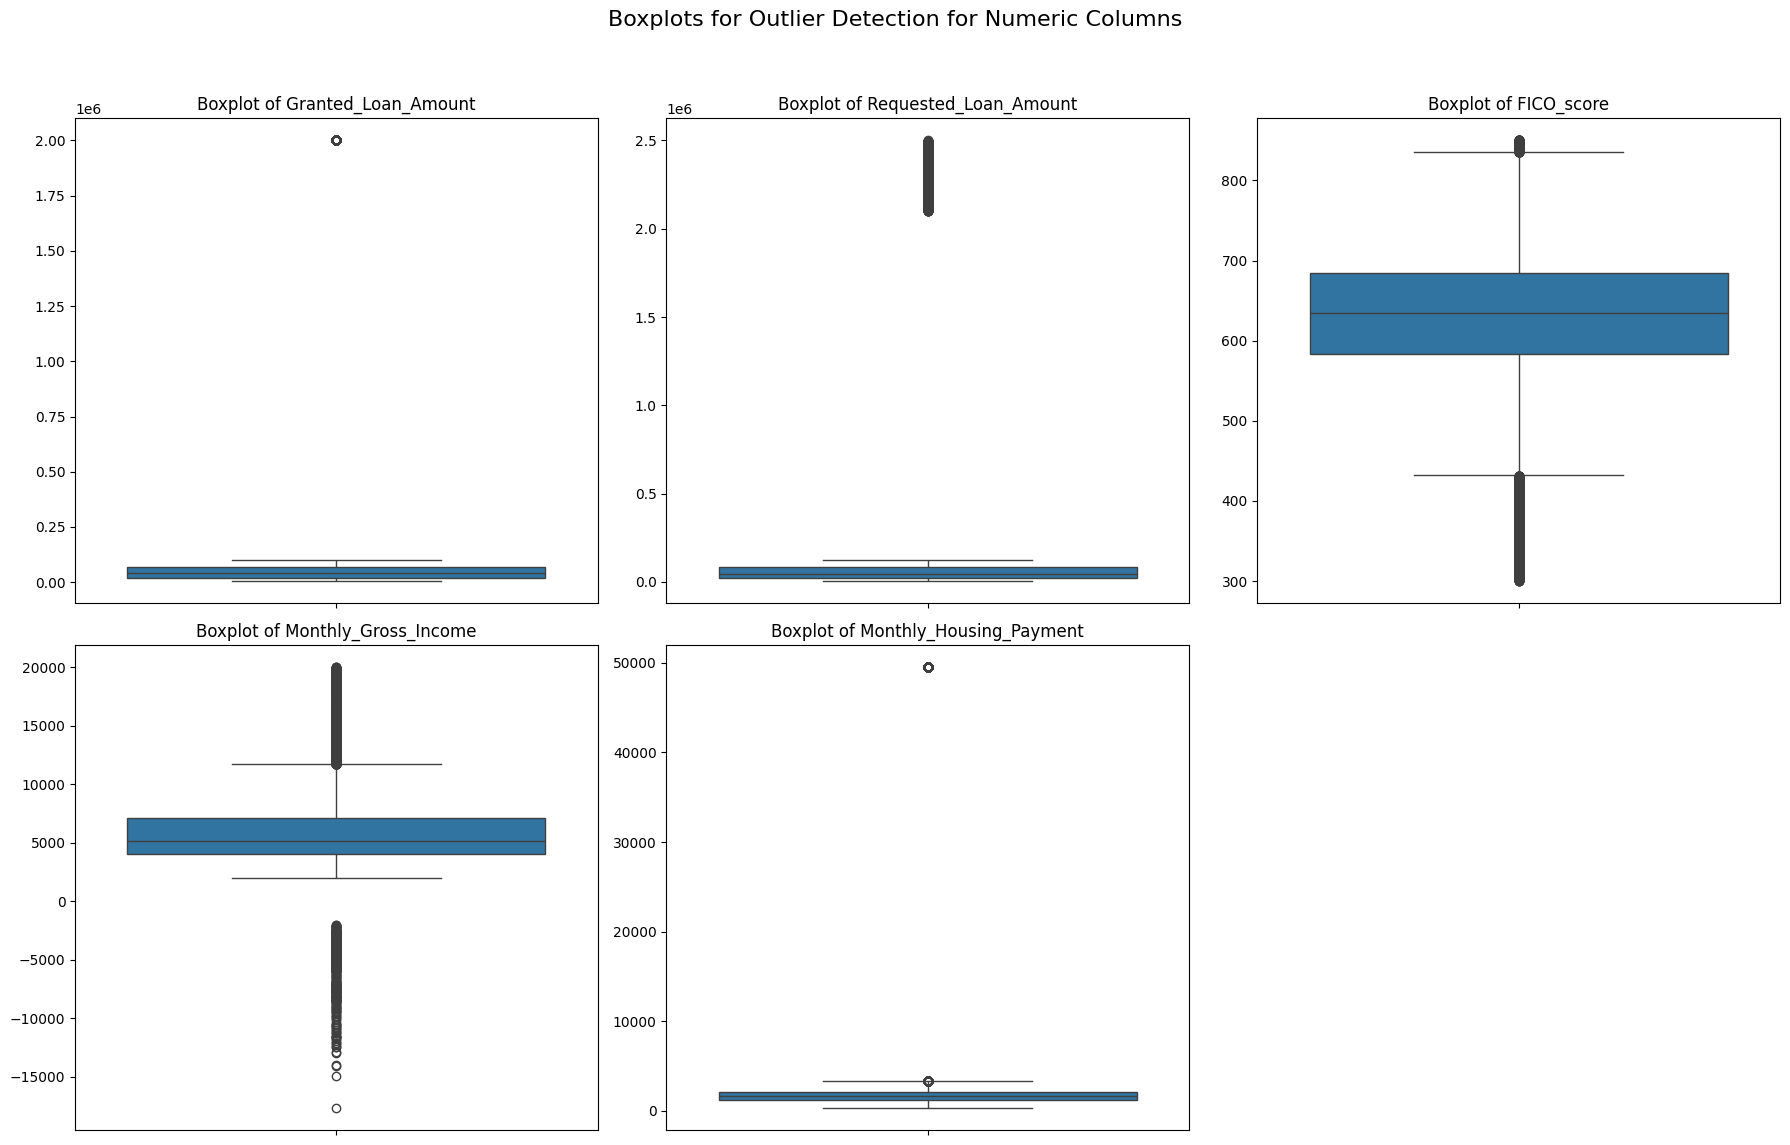

In [19]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Granted_Loan_Amount', 'Requested_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment']

# Boxplots to highlight outliers for numerical columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=Loan_data_imputed[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.suptitle("Boxplots for Outlier Detection for Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()

In [20]:
# Remove Outliers using Z-score

from scipy import stats
import numpy as np

# Compute Z-scores for only numeric columns
z_scores = np.abs(stats.zscore(Loan_data_imputed[numeric_cols], nan_policy='omit'))

# Choose threshold
threshold = 3  # common choice: 3 standard deviations

# Identify rows to keep (all Z-scores <= threshold)
rows_to_keep = (z_scores < threshold).all(axis=1)

# Track counts before/after
before_count = Loan_data_imputed.shape[0]
df_clean = Loan_data_imputed[rows_to_keep].copy()
after_count = df_clean.shape[0]

print(f"Outlier removal complete:")
print(f"Rows before: {before_count}")
print(f"Rows after:  {after_count}")
print(f"Rows removed: {before_count - after_count}")

Outlier removal complete:
Rows before: 100000
Rows after:  95691
Rows removed: 4309


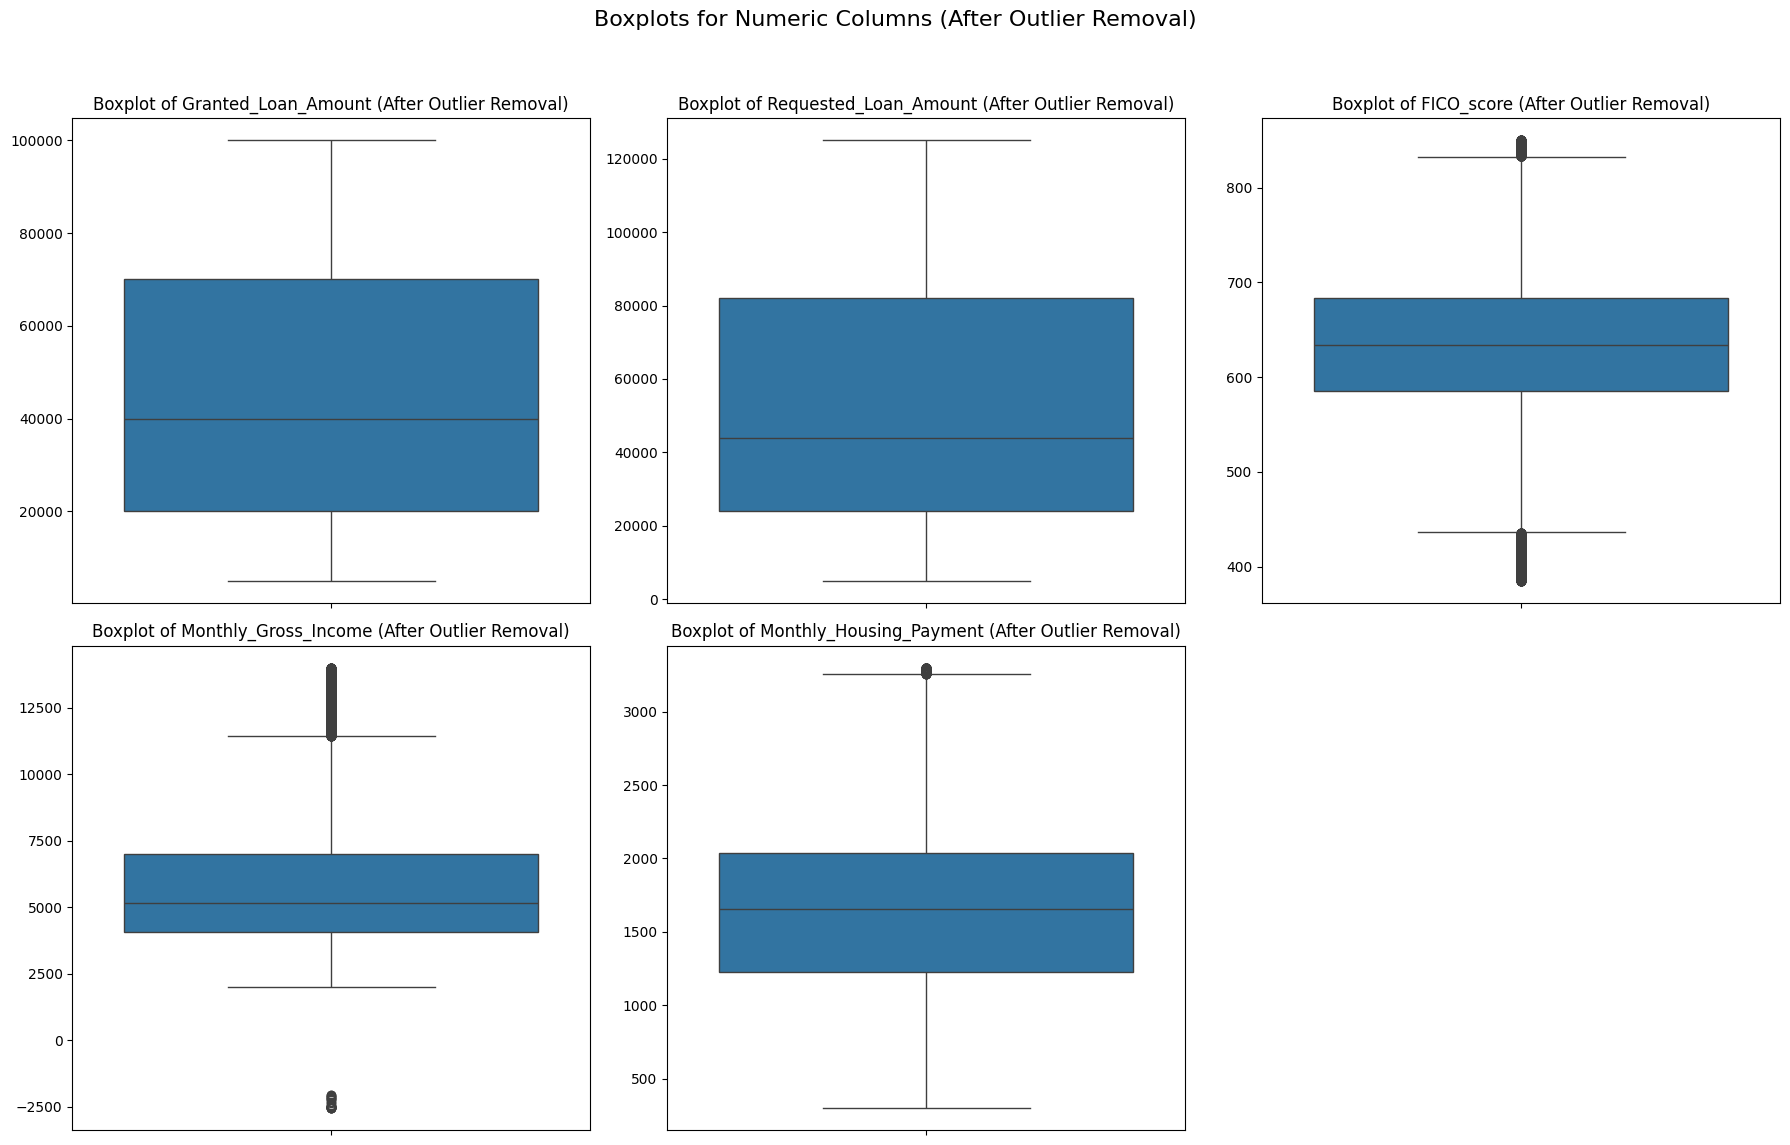

In [21]:
# BoxPlots after outlier removal
# Changed to df_clean and Remove y-label to avoid clutter
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.ylabel('')
plt.suptitle("Boxplots for Numeric Columns (After Outlier Removal)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Question:**
Why do we need to remove or treat outliers? Provide reasoning based on model performance or data integrity.

**Answer:**
We need to take attention to outliers because they can cause the models to be skewed and distorted causing it to be harder for the model to learn the relationships. As we can see before the outliers were removed it was hurting the predictive performance and giving us a misleading idea of what the typical applicant was applying for. Ouliers can also sometimes inflate important stats such as the mean. After adjusting these outliers we have protected both the model performance and the data integriy of the datas patterns which ensures accuracy.

**Question:**
Is there a difference between boxplots before and after outlier removal?

**Answer:**
Yes! We can defiently see a differnce as the before plots show isolated points a good distance away from the majority of the data. Because of the outliers its harder to get a general understanding of what the typical applicant looks like. After the removal we are able to see where the bulk of the data sits and the whiskers become shorter with the extreme points gone. Overall, the boxplots are now easier to interpret and helps us be able to have a more accurate focus on the typical value range.

The outliers were removed using z-scores with a threshold of 3 which stablizes the logistic regression model because it reduces the extreme values but still keeps the data relatic because we still want to have some representation for all applicants.

### 1.3 Redundancy & Correlation Check (5 Marks)

Detect duplicate data and multicollinearity.

**Question:**
Which numerical variables appear most strongly correlated with each other?

**Answer:**
From looking at the heatmap we can see that granted loan amount and requested loan amount show the nearly perfect correlation which tells us that all applicants we granted some portion and that it was close to the amount that they requested. Other values dont have as strong of a correlation which tells us that the information in those models are mostly independent.


**Question:**
Which numerical and categorical are strongly corelated to each other?

**Answer:**
The strongest correlation is beterrn FICO scofre and the FICO score group with a high correaltion ratio(.85). This high ratio was expected since the categorical group comes from a numeric score. We can also assume that there is some duplicated information(redundancy). There were some moderate correlations behind this involoving monthly gross income with employment status(.50), FICO score group(.27), and employment sector(.27). Employment Status's high correlation means that there is income will vary based of the type of work the applicant does. The categorical variables give us insight into the variation in the numeric features.

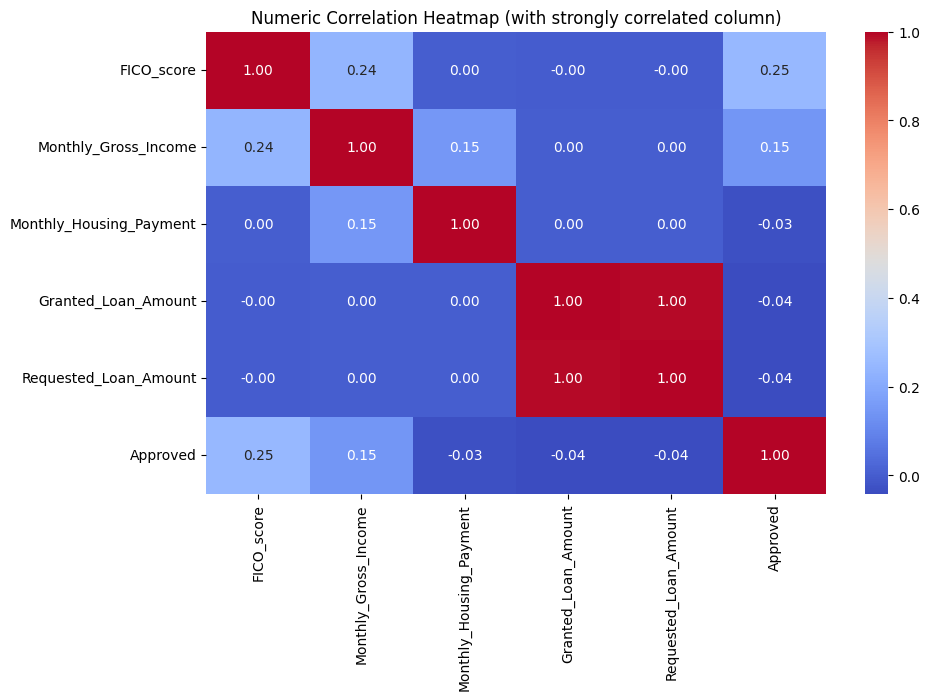

In [22]:
# Correlation between numerical features
numeric_cols = ['FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment', 'Granted_Loan_Amount','Requested_Loan_Amount', 'Approved']

# Plot correlation matrix, identify highly correlated pairs automatically (|corr|>0.95, excluding self-correlation)
corr = df_clean[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Numeric Correlation Heatmap (with strongly correlated column)")
plt.show()


Top 10 Numeric-Categorical Correlation Ratios (η²):
FICO_score - Fico_Score_group: η² = 0.729 (η = 0.854)
Monthly_Gross_Income - Employment_Status: η² = 0.246 (η = 0.496)
Monthly_Gross_Income - Fico_Score_group: η² = 0.074 (η = 0.272)
Monthly_Gross_Income - Employment_Sector: η² = 0.070 (η = 0.265)
Monthly_Housing_Payment - Employment_Status: η² = 0.039 (η = 0.198)
Ever_Bankrupt_or_Foreclose - Employment_Status: η² = 0.030 (η = 0.174)
Monthly_Housing_Payment - Lender: η² = 0.028 (η = 0.169)
Ever_Bankrupt_or_Foreclose - Employment_Sector: η² = 0.026 (η = 0.162)
Monthly_Gross_Income - Lender: η² = 0.008 (η = 0.090)
Ever_Bankrupt_or_Foreclose - Lender: η² = 0.005 (η = 0.071)


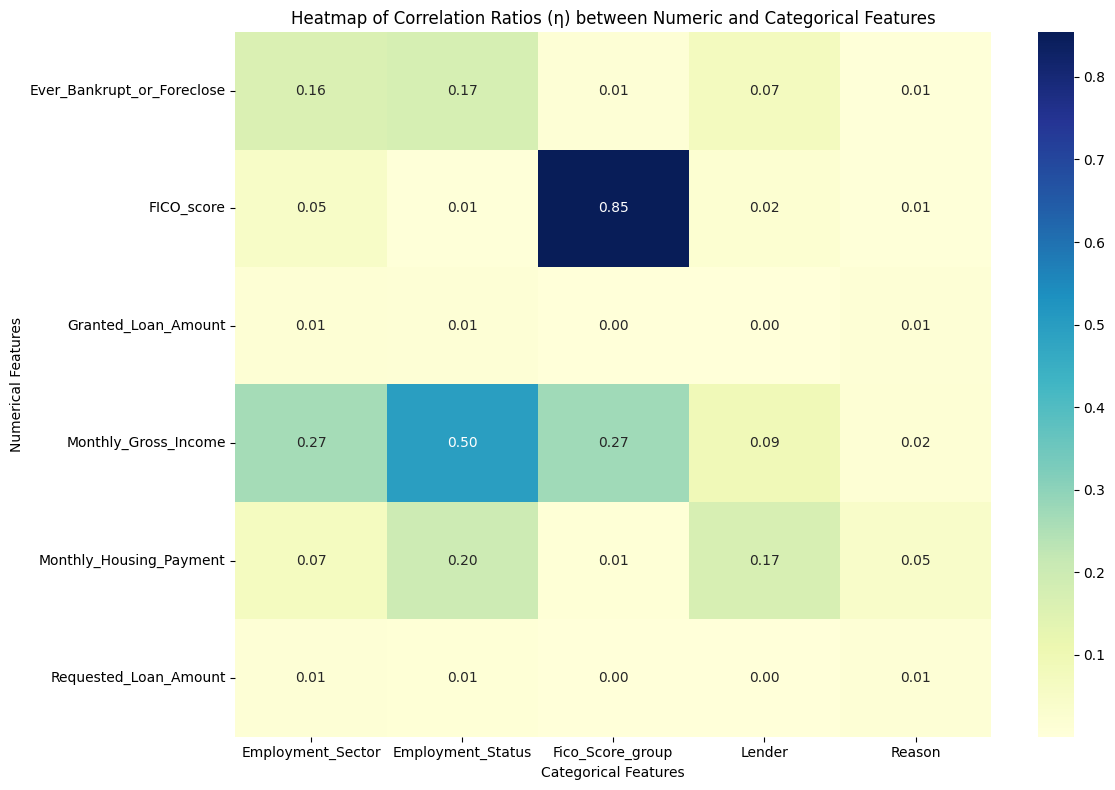

In [23]:
# Correlation between Numeric and Categorical Variables (Correlation Ratio / η²)
from scipy import stats

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    cat_levels = np.unique(categories)
    overall_mean = np.mean(values)
    numerator = sum(len(values[categories == cat]) *
                    (np.mean(values[categories == cat]) - overall_mean) ** 2
                    for cat in cat_levels)
    denominator = sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# test all numeric–categorical pairs
num_cat_results = []


# Identify categorical and numerical columns
categorical_cols_clean = df_clean.select_dtypes(include='object').columns.tolist()
numeric_cols_clean = df_clean.select_dtypes(include=np.number).columns.tolist()


numeric_cols_for_eta = [col for col in numeric_cols_clean if col not in ['bounty', 'Approved', ]]
categorical_cols_for_eta = [col for col in categorical_cols_clean]


for num_col in numeric_cols_for_eta:
    for cat_col in categorical_cols_for_eta:
        eta = correlation_ratio(df_clean[cat_col], df_clean[num_col])
        num_cat_results.append((num_col, cat_col, eta))

num_cat_results = sorted(num_cat_results, key=lambda x: x[2], reverse=True)
print("Top 10 Numeric-Categorical Correlation Ratios (η²):")
for num_col, cat_col, eta in num_cat_results[:10]:
    print(f"{num_col} - {cat_col}: η² = {eta**2:.3f} (η = {eta:.3f})")


# Reorganize the correlation ratio results into a pivot table/matrix for heatmap
eta_matrix = pd.DataFrame(num_cat_results, columns=['Numerical_Feature', 'Categorical_Feature', 'Eta'])
eta_pivot = eta_matrix.pivot(index='Numerical_Feature', columns='Categorical_Feature', values='Eta')

# Plot the heatmap of correlation ratios (Eta)
plt.figure(figsize=(12, 8))
sns.heatmap(eta_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Correlation Ratios (η) between Numeric and Categorical Features")
plt.xlabel("Categorical Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()



**Questions:** What features will you consider dropping after analyzing the graphs above?

**Answer:**
We could consider dropping granted loan amount or requested loan amount as they both are carrying nearly identical information. We need to avoid multicollinearity in a logistic regression so we can keep the stability. We could also look at dropping FICO score group or FICO score since they come from the numerical score. This would also help prevent redundancy.


> *Note: For Decision Tree models, you do not need to remove or adjust for collinearity. The algorithm can naturally handle correlated features through its splitting mechanism. However, for Logistic Regression, multicollinearity can distort coefficient estimates and make interpretations unreliable. In that case, you may consider removing one variable from highly correlated pairs.


# Evan

## 2. Exploratory Data Analysis

### 2.1 Target Variable Distribution

Analyze the distribution of the target variable (Approved) to understand class balance in loan approval outcomes.


**Question:**
Is the dataset balanced or imbalanced? Briefly explain the implication for modeling.


**Answer:**
Thed ataset is imbalanced: about 89% of loans are denied and only 11% approved. The model could achieve high overall accuracy by mostly predicting “denied,” but it would perform poorly on the minority approved class. Need weighting/resampling

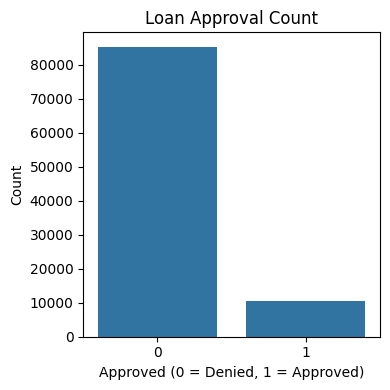

Counts:
Approved
0    85309
1    10382
Name: count, dtype: int64

Proportions:
Approved
0    0.892
1    0.108
Name: proportion, dtype: float64


In [24]:

df = df_clean.copy()   # df_clean was created after outlier removal

# Count plot of target to analyze distriubtion
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='Approved')
plt.title('Loan Approval Count')
plt.xlabel('Approved (0 = Denied, 1 = Approved)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print counts and proportions
print("Counts:")
print(df['Approved'].value_counts())
print("\nProportions:")
print(df['Approved'].value_counts(normalize=True).round(3)) #gemni helped plot formatting


### 2.2 Distribution of Numerical Variables by Approval

Explore how key numerical variables differ between approved and rejected loan applications.


**Question:**
Which numerical variable is the most helpful variable ( most crucial predictor) ?

**Answer:**
The most helpful numerical predictor is FICO_score. In the histogram and box plot, approved loans have much higher FICO scores with a clear shift. There is more overlap happening with the other numeric variables

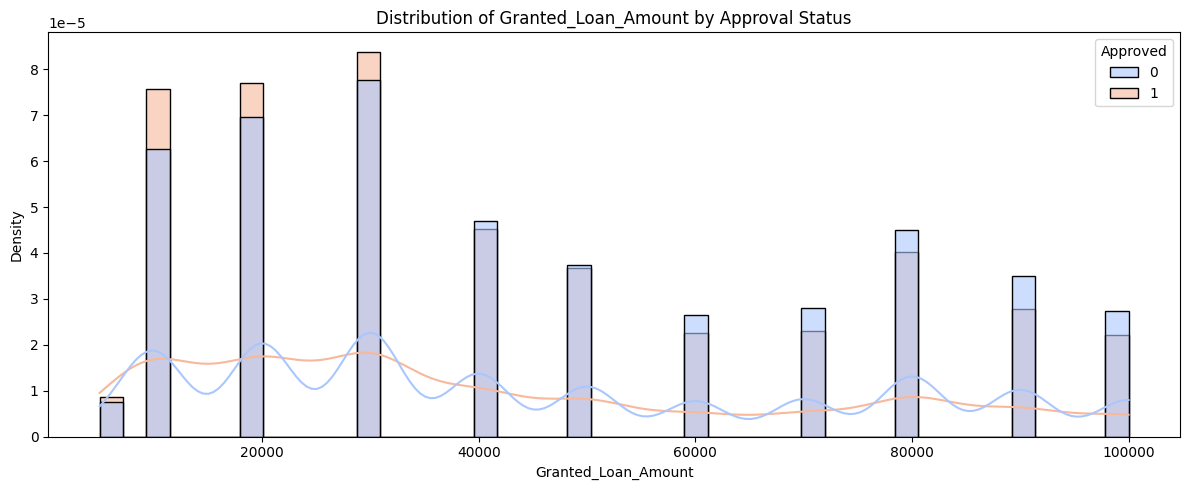

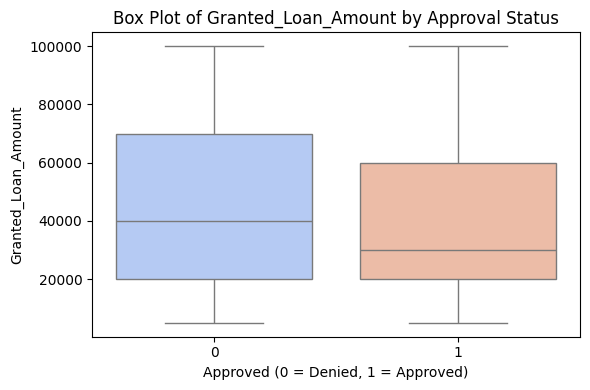

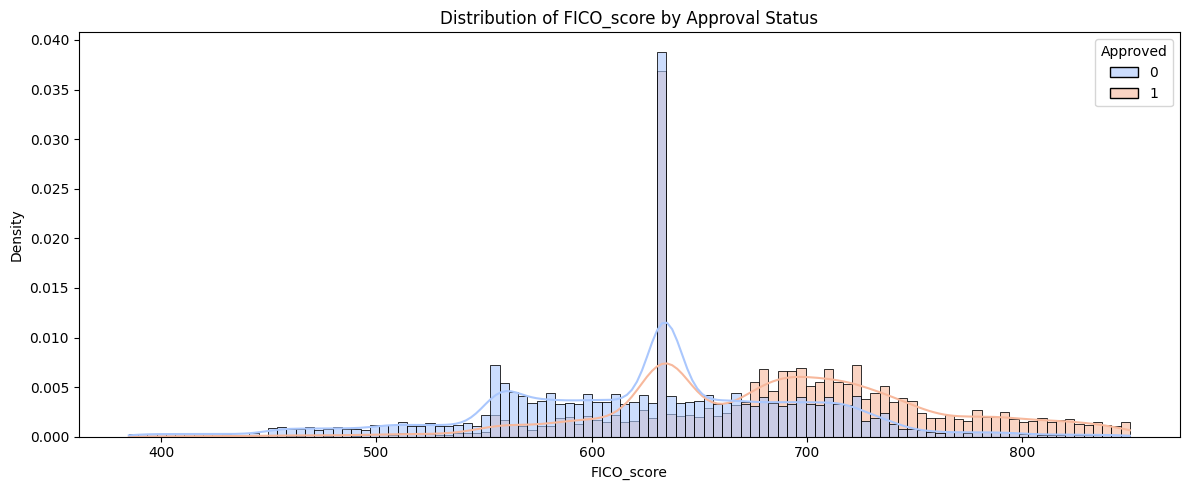

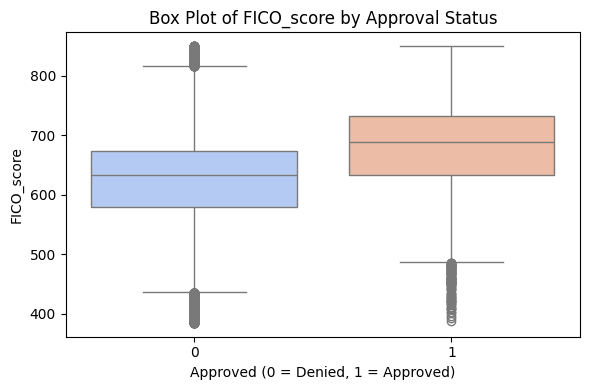

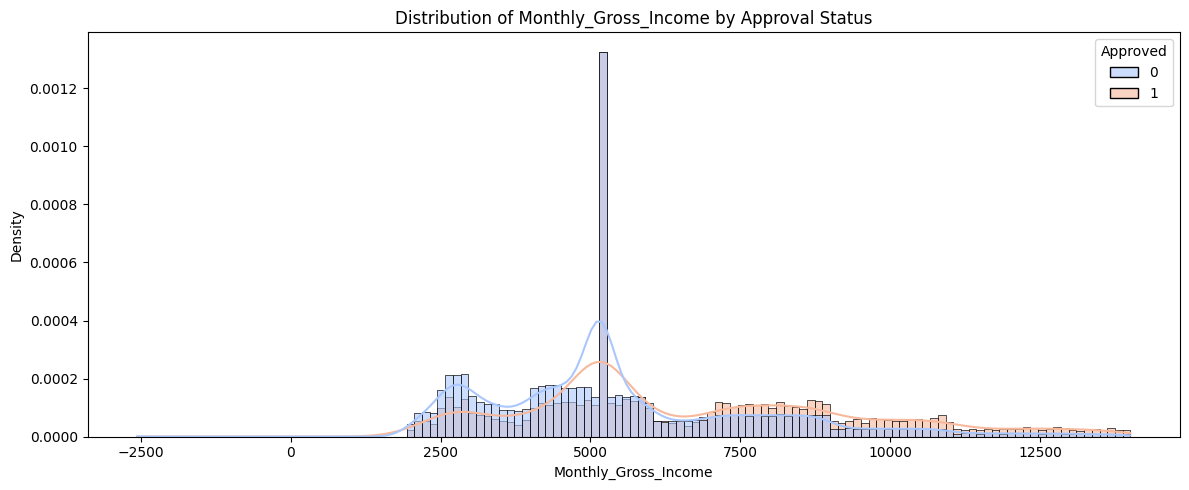

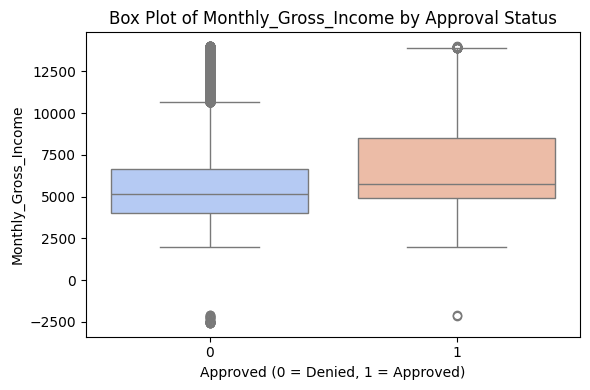

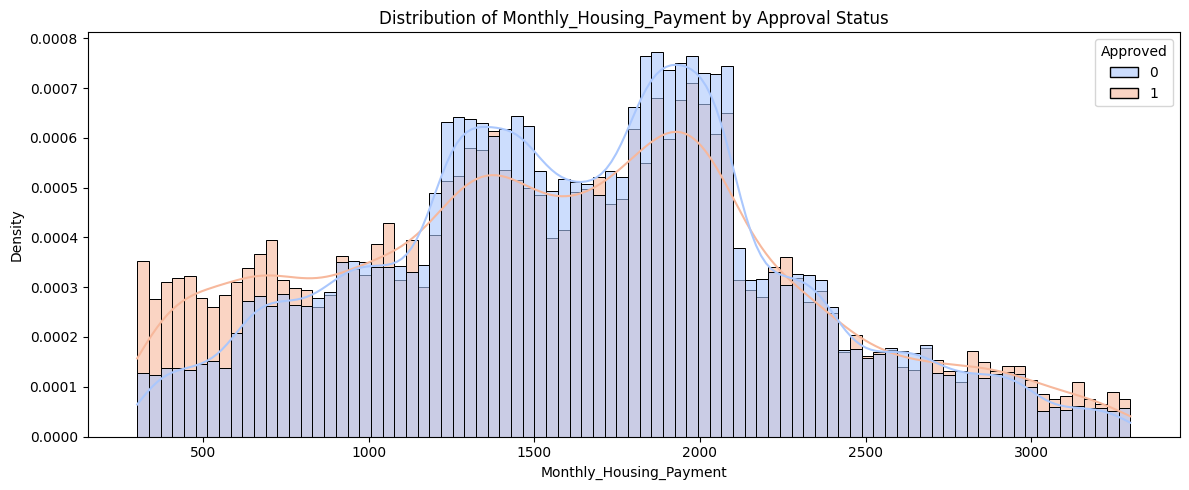

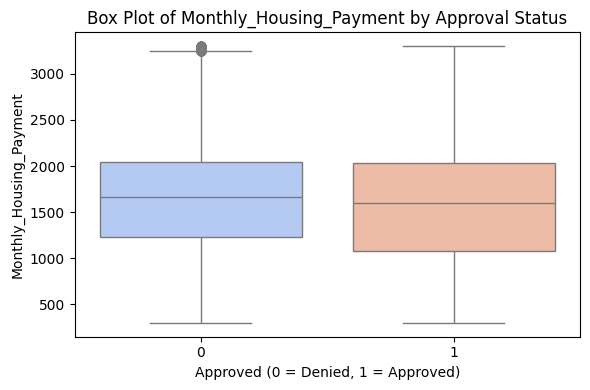

In [25]:
# Visualise numerical variables against target variable

numerical_cols = ['Granted_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment']

for col in numerical_cols:
    plt.figure(figsize=(12,5))
    sns.histplot(
        data=df,
        x=col,
        hue='Approved',
        kde=True,
        stat='density',
        common_norm=False,
        palette='coolwarm',
        alpha=0.6
    )
    plt.title(f'Distribution of {col} by Approval Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Approved',
        y=col,
        hue='Approved',
        palette='coolwarm',
        legend=False
    )
    plt.title(f'Box Plot of {col} by Approval Status')
    plt.xlabel('Approved (0 = Denied, 1 = Approved)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### 2.3 Categorical Variables and Approval

Analyze how categorical variables (such as Employment_Sector, Loan_Purpose, or Residence_Type) relate to the loan approval outcome.


**Question:**
Which categorical variable appears to have the strongest relationship with loan approval, and how can you tell?

**Answer:**
Fico_Score_group has the strongest relationship to approval. Approval rates rise from just a few percent in the poor/fair groups to nearly half in the excellent group, a much larger spread than for Lender or Employment_Sector.

**Question:**
Are there any categories (e.g., Reason, Employment_Status) that appear to have minimal predictive value? Justify your answer with approval rate differences.

**Answer:**
Reason appears to have minimal predictive value. All reasons have approval rates clustered around 10–11%, with only tiny differences between categories.

Variables like Fico_Score_group or Ever_Bankrupt_or_Foreclose show large approval-rate differences between categories, so they are likely to be much more useful predictors than Reason.

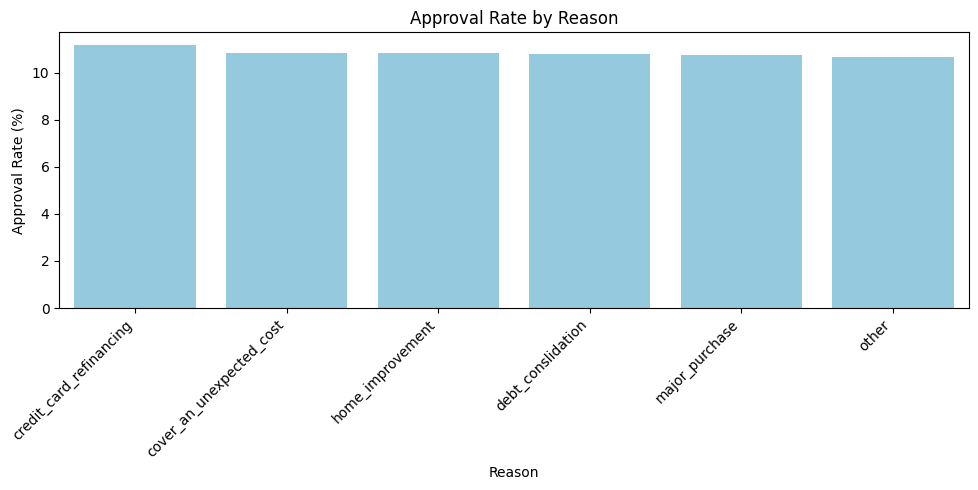


Approval Rate by Reason:
Reason
credit_card_refinancing     11.16
cover_an_unexpected_cost    10.85
home_improvement            10.83
debt_conslidation           10.78
major_purchase              10.74
other                       10.69
Name: Approved, dtype: float64


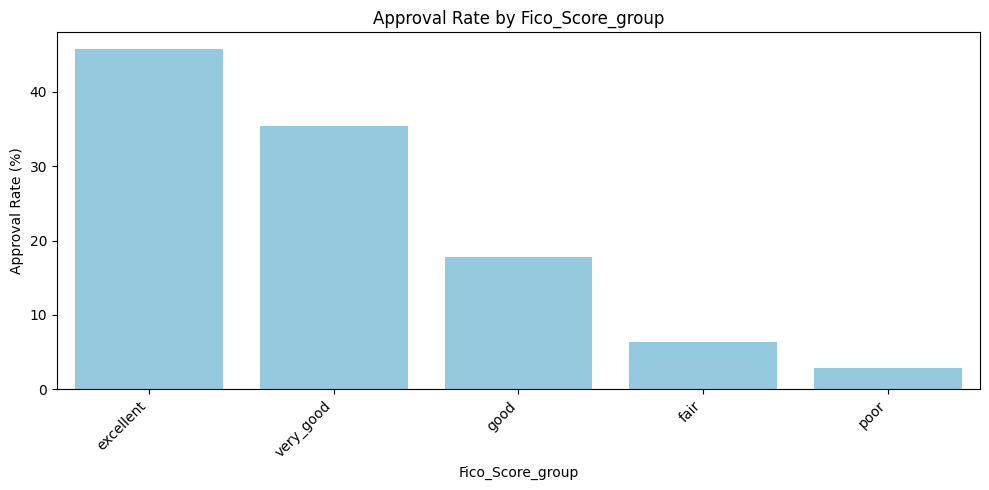


Approval Rate by Fico_Score_group:
Fico_Score_group
excellent    45.71
very_good    35.35
good         17.80
fair          6.37
poor          2.87
Name: Approved, dtype: float64


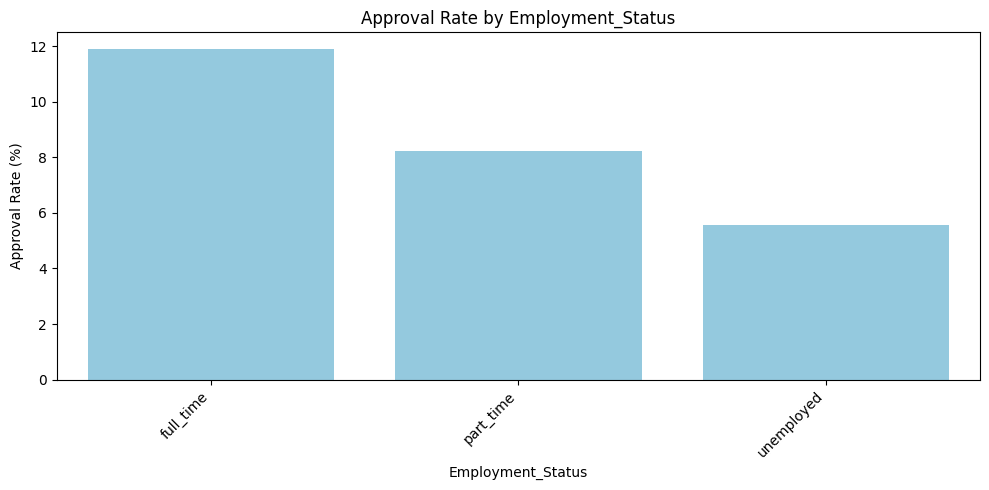


Approval Rate by Employment_Status:
Employment_Status
full_time     11.90
part_time      8.23
unemployed     5.56
Name: Approved, dtype: float64


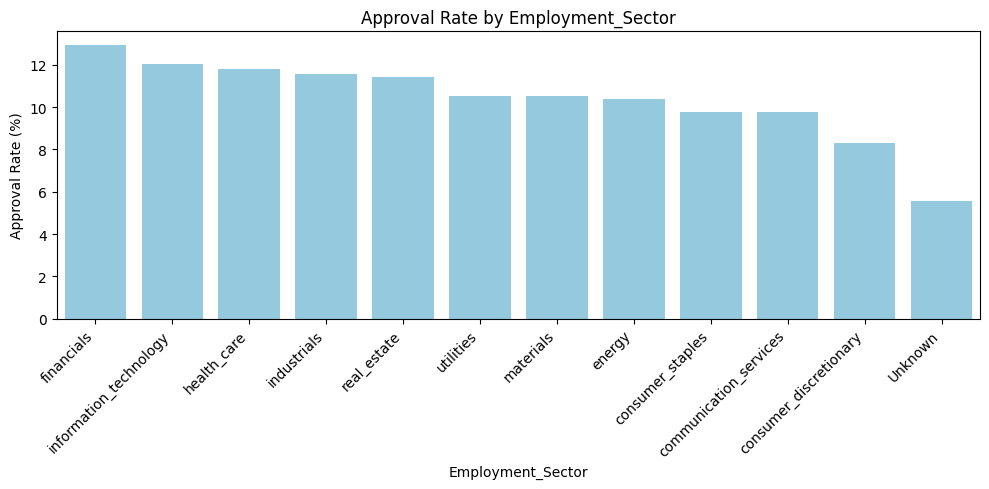


Approval Rate by Employment_Sector:
Employment_Sector
financials                12.94
information_technology    12.02
health_care               11.80
industrials               11.57
real_estate               11.45
utilities                 10.55
materials                 10.54
energy                    10.38
consumer_staples           9.79
communication_services     9.76
consumer_discretionary     8.33
Unknown                    5.56
Name: Approved, dtype: float64


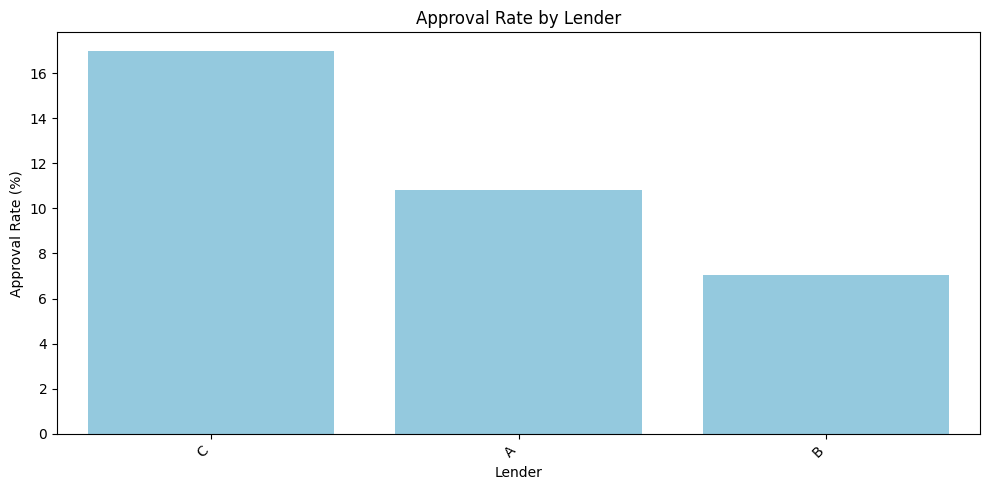


Approval Rate by Lender:
Lender
C    16.96
A    10.80
B     7.04
Name: Approved, dtype: float64


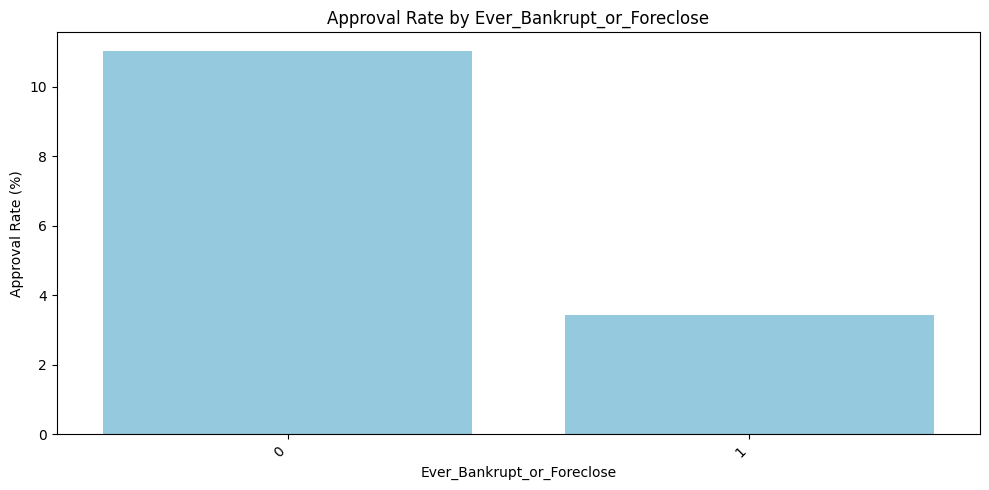


Approval Rate by Ever_Bankrupt_or_Foreclose:
Ever_Bankrupt_or_Foreclose
0    11.02
1     3.45
Name: Approved, dtype: float64


In [26]:
# Visualise categorical variables against target variable

categorical_cols = [
    'Reason', 'Fico_Score_group', 'Employment_Status',
    'Employment_Sector', 'Lender', 'Ever_Bankrupt_or_Foreclose'
]

for col in categorical_cols:
    approval_rates = df.groupby(col)['Approved'].mean().sort_values(ascending=False) * 100

    plt.figure(figsize=(10,5))
    sns.barplot(x=approval_rates.index, y=approval_rates.values, color='skyblue')
    plt.title(f'Approval Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Approval Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"\nApproval Rate by {col}:\n{approval_rates.round(2)}")


### Cross Feature plots for multi-dimensional analysis.

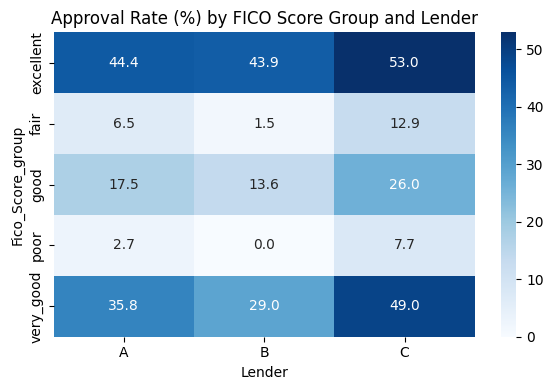

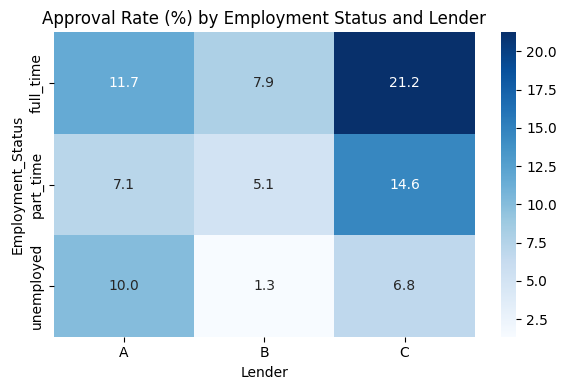

In [32]:
# FICO group x Lender
fico_lender = pd.crosstab(
    df['Fico_Score_group'],
    df['Lender'],
    values=df['Approved'],
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 4))
sns.heatmap(fico_lender, annot=True, fmt=".1f", cmap="Blues")
plt.title("Approval Rate (%) by FICO Score Group and Lender")
plt.ylabel("Fico_Score_group")
plt.xlabel("Lender")
plt.tight_layout()
plt.show()

# Employment status x Lender
emp_lender = pd.crosstab(
    df['Employment_Status'],
    df['Lender'],
    values=df['Approved'],
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 4))
sns.heatmap(emp_lender, annot=True, fmt=".1f", cmap="Blues")
plt.title("Approval Rate (%) by Employment Status and Lender")
plt.ylabel("Employment_Status")
plt.xlabel("Lender")
plt.tight_layout()
plt.show()



## 3.5 Business Insights from EDA

After completing your visualizations and cross-feature analyses, summarize your findings in the context of loan approval and lender matching.  
Use this section to connect data patterns to real-world meaning before building predictive models.


**Question:** Which variables are the most helpful in understanding if a customer is going to be approved or denied for a loan?  

**Answer**: Add your answer here

**Question:** Are there any feature modifications or transformations that would improve the predictive power of a variable?  

**Answer**: Add your answer here

**Question:** What is each lender’s average approval rate?  

**Answer**: Add your answer here

**Question:** Are there any clear differences between the three lenders in terms of which types of customers they approve?  

**Answer**: Add your answer here

**Question:** Are there variables that reliably predict a customer’s approval likelihood for a particular lender?  

**Answer**: Add your answer here



> Treat this section as your interpretation bridge between EDA and modeling. The goal is to show that you understand *why* certain patterns exist, not just that they exist.


## 3. Model Training

### 3.1 Train/Test Split and Encoding

In [35]:
from sklearn.model_selection import train_test_split
import pandas as pd

df_model = df_clean.copy()

# Features: drop target + leakage
X = df_model.drop(columns=['Approved', 'bounty'])

# Target
y = df_model['Approved']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Set RANDOM_STATE = 42 for reproducibility.
random_state = 42

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=random_state,
    stratify=y
)


### 3.2 Logistic Regression Model
Build and interpret a Logistic Regression model to predict the likelihood of loan approval (Approved = 1).

**Question**
How accurate is the model on the test data, and what does this imply about its predictive strength?

**Answer**
Add your answer here


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build logistic regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

# Fit on training data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Accuracy on test set
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression: {lr_accuracy:.3f}")


Logistic Regression: 0.709


ROC-AUC: 0.793
Confusion Matrix:
[[12046  5017]
 [  547  1529]]


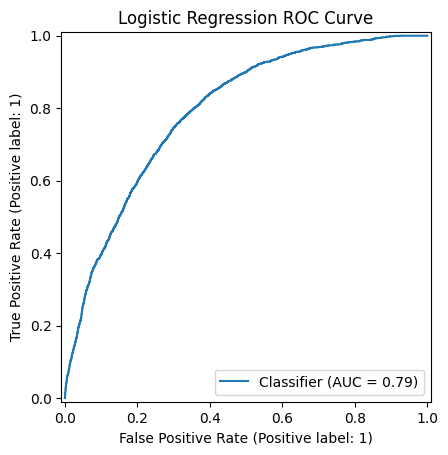

In [38]:
from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay

# Predicted probabilities
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# ROC-AUC
auc = roc_auc_score(y_test, y_proba_lr)
print(f"ROC-AUC: {auc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# Optional: ROC curve plot
RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("Logistic Regression ROC Curve")
plt.show()


### 3.2 Decision Tree Classifier Model

Build and interpret a Decision Tree Classifier Model to predict the likelihood of loan approval (Approved = 1).



**Question**
How does the Decision Tree’s accuracy and AUC compare to the Logistic Regression model?

**Answer**
Add your answer here


Decision Tree test accuracy: 0.730
Decision Tree ROC-AUC:       0.781
Decision Tree Confusion Matrix:
[[12532  4531]
 [  638  1438]]


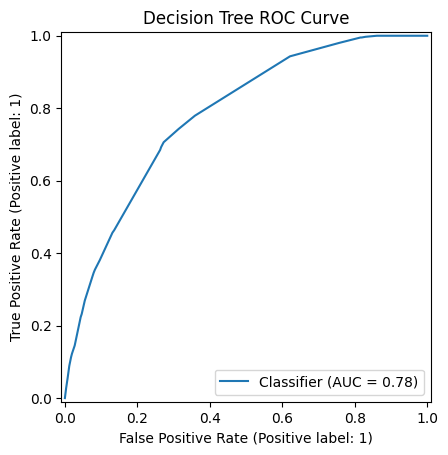

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay

dt = DecisionTreeClassifier(
    criterion='entropy',      # use entropy for splits
    max_depth=5,              # limit depth to reduce overfitting
    min_samples_leaf=200,     # minimum samples per leaf
    class_weight='balanced',
    random_state=random_state
)

# Fit on training data
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Accuracy and AUC
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_proba_dt)

print(f"Decision Tree test accuracy: {dt_acc:.3f}")
print(f"Decision Tree ROC-AUC:       {dt_auc:.3f}")

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# ROC curve to evaulate
RocCurveDisplay.from_predictions(y_test, y_proba_dt)
plt.title("Decision Tree ROC Curve")
plt.show()


The Decision Tree has 73.0% accuracy, slightly higher than the Logistic Regression model’s 70.9%, and an AUC of 0.781, which is in the same high-0.7 range as Logistic Regression. Overall, both models have similar predictive strength, with the tree trading a bit more accuracy for roughly comparable discrimination.


Top 10 features (Decision Tree):
FICO_score                      0.443925
Lender_B                        0.157278
Fico_Score_group_poor           0.107490
Fico_Score_group_fair           0.085218
Fico_Score_group_good           0.070051
Monthly_Housing_Payment         0.047274
Lender_C                        0.036545
Employment_Status_unemployed    0.017793
Monthly_Gross_Income            0.016710
Employment_Status_part_time     0.009006
dtype: float64


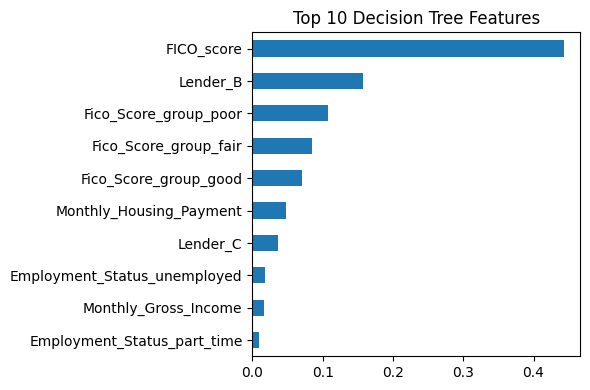

In [40]:
import pandas as pd

# Variable importance for DT
feat_imp = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

print("Top 10 features (Decision Tree):")
print(feat_imp.head(10))

#Wanted to plot as well to visualize all these variables
plt.figure(figsize=(6,4))
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Decision Tree Features")
plt.tight_layout()
plt.show()


### Compare the performance of the Logistic Regression and Decision Tree models.


1.   Compare the performance of the Logistic Regression and Decision Tree
models.
2.   Evaluate and compare both models using key metrics such as ROC-AUC, Accuracy, Precision, Recall, and F1-score.
3. Plot and interpret the confusion matrices for both models. Discuss what false positives and false negatives mean in the business context (for example, approving risky applicants vs. rejecting qualified ones).
4. Identify which model best captures the target event (loan approval) and explain why.
5. Justify your model choice from both technical (performance, interpretability) and business (actionability, trust, and decision-making) perspectives.
6. Indicate the cutoff threshold you used and why it makes sense for this scenario.

In [44]:
model = log_reg

In [47]:
import pickle

# Save model columns for Streamlit app
model_columns = X_train.columns.tolist()

with open("model_columns.pkl", "wb") as f:
    pickle.dump(model_columns, f)

print("Saved model_columns.pkl")


Saved model_columns.pkl


In [48]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load model and columns
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("model_columns.pkl", "rb") as f:
    model_columns = pickle.load(f)

st.title("Loan Approval Probability")

# Simple user inputs
fico = st.number_input("FICO score", min_value=300, max_value=850, value=650)
income = st.number_input("Monthly Gross Income", min_value=0, value=5000)
loan_amt = st.number_input("Requested Loan Amount", min_value=1000, value=20000)
housing = st.number_input("Monthly Housing Payment", min_value=0, value=1500)

lender = st.selectbox("Lender", ["A", "B", "C"])
emp_status = st.selectbox("Employment Status", ["full_time", "part_time", "unemployed"])
bankrupt = st.selectbox("Ever Bankrupt or Foreclosed?", ["No", "Yes"])

if st.button("Predict"):
    # base data row
    data = {
        "Requested_Loan_Amount": loan_amt,
        "Granted_Loan_Amount": loan_amt,  # simple proxy
        "FICO_score": fico,
        "Monthly_Gross_Income": income,
        "Monthly_Housing_Payment": housing,
        "Ever_Bankrupt_or_Foreclose": 1 if bankrupt == "Yes" else 0,
        "Lender": lender,
        "Employment_Status": emp_status,
        # simple defaults for other categoricals
        "Reason": "Other",
        "Fico_Score_group": "good",
        "Employment_Sector": "Other",
        "applications": 1
    }

    df_input = pd.DataFrame([data])

    # same encoding as training: get_dummies(drop_first=True)
    X_input = pd.get_dummies(df_input, drop_first=True)
    X_input = X_input.reindex(columns=model_columns, fill_value=0)

    prob = model.predict_proba(X_input)[0, 1]
    st.write(f"Estimated approval probability: **{prob:.2%}**")


2025-12-07 02:32:00.254 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 02:32:00.445 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-07 02:32:00.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 02:32:00.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 02:32:00.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 02:32:00.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 02:32:00.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 02:32:00.455 Thread 'MainThread': mi

In [46]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.6 MB/s eta 0:00:00


**Question:**
Which model do you recommend and why? (Provide both technical and business reasoning.)

**Answer:** Add your answer here

## 5. Recommendations
In this final section, summarize your key findings and provide concise business recommendations based on your analysis.


**Write a short paragraph including:**  
- A brief summary of your main findings from the analysis and model comparison.  
- The key factors that most influence loan approval.  
- Your recommendations on data or model based on the results  (for example, how approval decisions could be improved or better understood).  
- One next step you would take to improve the model or extend the analysis further.  


**Add your paragraph here:**



---



**Question:**  What trade-offs or risks should the company be aware of when using this model?  

**Answer:** Add your answer here

**Question:** How confident are you in your model’s generalizability — what might change its performance in real-world use?   

**Answer:** Add your answer here


**Question:** If you had access to additional data, what new feature would you collect to strengthen this model?

**Answer:** Add your answer here